## 문자열 (string)  
- 패턴 매칭  
- 문자열 암호화  
- 문자열 압축 

### 패턴 매칭에 사용되는 알고리즘들 
- ***(문자를 검색하는 것)***
- 고지식한 패턴 검색 알고리즘  
- 카프-라빈 알고리즘  
- KMP 알고리즘  
- 보이어-무어 알고리즘  

### 고지식한 알고리즘 (Brute Force) 
- 완전 탐색  
- 본문 문자열을 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식으로 동작


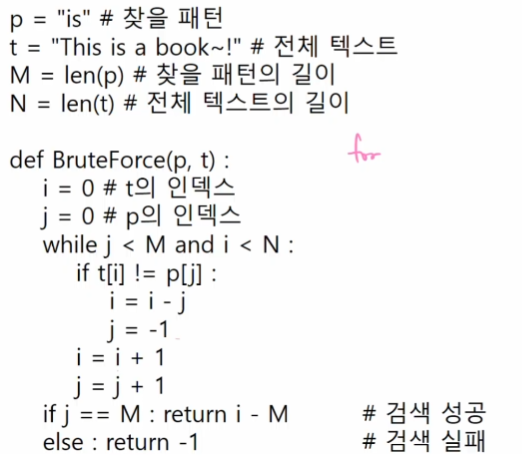

In [2]:
p = "is" # 찾을 패턴
t = "This is a book~!" # 전체 텍스트
M = len(p) # 찾을 패턴의 길이 
N = len(t) # 전체 텍스트의 길이

def BruteForce(p, t):
    i = 0 #t의 인덱스
    j = 0 #p의 인덱스
    while j < M and i < N:
        if t[i] != p[j]:
            i=i-j
            j = -1
        i = i + 1
        j = j + 1
    if j == M: return i - M  #검색 성공
    else : return -1  #검색 실패

    

In [3]:
# https://swexpertacademy.com/main/solvingProblem/solvingProblem.do
# 4864. 문자열 비교
def find(pattern, txt, M, N) :
    M = len(pattern)
    N = len(txt)
    for i in range(N-M+1) :
        for j in range(M) :
            if txt[i+j] != pattern[j]:
                break
        else: # break 안 거치고 다 돌았을 때만 옴
            return 1
    
    return 0
        





T = int(input())
for tc in range(1, T+1) :
    pattern = input()
    txt = input()
    

    ans = find(pattern, txt, M, N)
    print(f'#{tc} {ans}')



### KMP 알고리즘
- 불일치가 발생한 텍스트 스트링의 앞 부분에 어떤 문자가 있는지를 미리 알고 있으므로, 불일치가 발생한 앞 부분에 대하여 다시 비교하지 않고 매칭 수행   

- 패턴을 전처리하여 배열 next[m]을 구해서 잘못된 시작을 최소화함
    - next[m] : 불일치가 발생했을 경우 이동할 다음 위치  
    
- 시간 복잡도 : O(M+N)

In [ ]:
def kmp(t, p) :
    N = len(t)
    M = len(p)
    lps = [0] * (M+1)

    # preprocessing
    j = 0
    lps[0] = -1
    for i in range(1, M):
        lps[i] = j
        if p[i] == p[j]:
            j += 1
        else:
            j = 0
    lps[M] = j

    #search
    i = 0 
    j = 0
    while i < N and j <= M :
        if j == -1 or t[i] == p[j]:
            i += 1
            j += 1
        else:
            j = lps[j]
        if j == M:
            print(i-M, end =' ')
            j = lps[j]
    print()
    return



In [ ]:
def make(pattern) :
    M = len(p)
    j = 0
    for i in range(1, M) :
        lps[i] = j
        if pattern[i] == pattern[j]:
            j += 1
        else :
            j = 0

def find(pattern, t) :
    N = len(t)
    M = len(pattern)
    ti = patterni = 0
    while ti < N and patterni < M:
        if patterni == -1 or t[ti] == pattern[patterni] :
            ti += 1
            patterni += 1
        else : 
            patterni = lps[patterni]
    if patterni == M :
        return ti - patterni
    else :
        return -1
        


t ='zzabcdabcef'
p = 'abc'

lps = [-1] ( len(pattern))
make(pattern)

### 보이어-무어 알고리즘
- 오른쪽에서 왼쪽으로 비교  
- 대부분의 ***상용 소프트웨어에서 채택하고 있는 알고리즘***  
<br>
- 보이어-무어 알고리즘은 패턴에 오른쪽 끝에 문자가 불일치하고,  
    이 문자가 패턴 내에 존재하지 않는 경우,  
    이동 거리는 무려 패턴의 길이만큼이 됨  


- 보이어-무어 알고리즘
    - 앞의 두 매칭 알고리즘들의 공통점 텍스트 문자열의 문자를 적어도 한번씩 훑는다는 것 -> 최선의 경우에도 Ω(n)  
    - 보이어-무어 알고리즘은 텍스트 문자를 다 보지 않아도 된다  
    - 발상의 전환 : 패턴의 오른쪽부터 비교한다  
    - 최악의 경우 수행시간 Θ(mn) 
    - 입력에 따라 다르지만 일반적으로 Θ(n)보다 시간이 덜 든다

In [ ]:
def make(p) :
    M = len(p)
    for i in range(1, M):
        c = p[i]
        jump[ord(c)] = M-1-i


def find(p, t):
    M = len(p)
    N = len(t)

    ti = 0
    pi = M-1

    while ti+pi<N and pi >= 0:
        if t[ti+pi] == p[pi]:
            pi -= 1
        else :
            pos = ord(t[ti+pi])
            ti += jump[pos]
            pi = M-1
    
    if pi < 0 : 
        return ti
    else :
        return -1




t = 'a pattern matching algorithem'
p = 'rithm'

jump = [len(p)] * ord('z')+1
make(p)
print(find(p,t))

### 문자열 매칭 알고리즘 비교
- 찾고자 하는 문자열 패턴의 길이 m, 총 문자열 길이 n  
- 고지식한 패턴 검색 알고리즘 : 수행시간 O(mn)  
- 카프-라빈 알고리즘 : 수행시간 Θ(n)  
- KMP 알고리즘 : 수행시간 Θ(n) 

In [1]:
print('a\nb')

a
b
